<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Tests_per_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

In [3]:
data_raw.head(3)

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand
0,Argentina - tests performed,2020-04-08,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,13330,NaN,0.293,NaN,NaN,NaN
1,Argentina - tests performed,2020-04-09,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,14850,1520.0,0.326,0.033,NaN,NaN
2,Argentina - tests performed,2020-04-10,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,16379,1529.0,0.360,0.034,NaN,NaN


In [0]:
list_countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 
                  'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                  'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
                  'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
                  'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
                  'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia',
                  'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

In [0]:
data = pd.DataFrame()

In [0]:
for country in list_countries:
  data[country] = data_raw[data_raw['Entity'].str.contains(country)].iloc[-1]

United States tiene dos series. Utilizo la que tiene datos más recientes.

In [0]:
data['United States'] = data_raw[data_raw['Entity'].str.contains('United States - inconsistent units')].iloc[-1]

In [0]:
data = data.T

In [9]:
data.tail(3)

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand
Turkey,Turkey - units unclear,2020-04-17,https://covid19.saglik.gov.tr/,Turkish Ministry of Health,NaN,558413,40270,6.661,0.48,38262.3,0.456
United Kingdom,United Kingdom - people tested,2020-04-17,https://www.gov.uk/guidance/coronavirus-covid-...,Public Health England/Department of Health and...,NaN,341551,13943,5.072,0.207,12984,0.193
United States,United States - inconsistent units (COVID Trac...,2020-04-16,https://covidtracking.com/api/us/daily.csv,COVID Tracking Project,NaN,3401064,158309,10.262,0.478,155353,0.469


In [0]:
data = data.sort_values(by='Cumulative total per thousand', ascending=True)

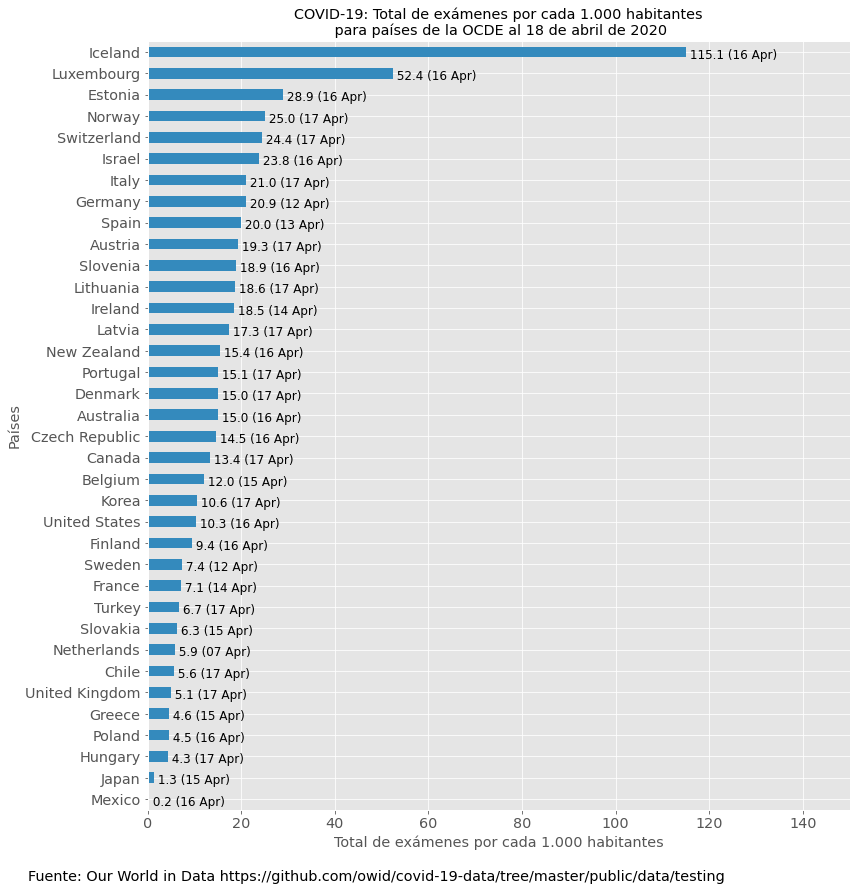

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
data['Cumulative total per thousand'].plot(kind='barh', ax=ax, color='C1', fontsize='x-large')
for i, val in enumerate(data['Cumulative total per thousand']):
  ax.text(val, i-0.3, f" {val:.1f} ({pd.to_datetime(data['Date'].iloc[i]).strftime('%d %b')})", fontsize='large')
ax.set_xlabel(f'Total de exámenes por cada 1.000 habitantes', fontsize='x-large')
ax.set_ylabel(f'Países', fontsize='x-large')
ax.set_title(f'COVID-19: Total de exámenes por cada 1.000 habitantes\n para países de la OCDE al 18 de abril de 2020', fontsize='x-large')
plt.xlim(0,150)
fig.tight_layout()
plt.annotate('Fuente: Our World in Data https://github.com/owid/covid-19-data/tree/master/public/data/testing', (0,0), (-120,-60), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("2020-04-18-COVID-19-Examenes-OCDE.png", format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-18-COVID-19-Examenes-OCDE.png")